In [1]:
import pandas as pd
import ast
import re 
import string
import tweepy
import time
import ast
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_excel("scraped_news_tweets.xlsx")
print(df.shape)
df.head()

(1999, 10)


,username,description,location,following,followers,text,likescount,retweetcount,date-time,hashtags
0,coconut01743115,coconut,NaN,360,287,RT @theanimalreader: 160 puppies and kittens packed in delivery boxes were rescued in China. Four died and the others were in bad condition…,0,4,2021-05-06 14:24:38,"['blockchain', 'boove', 'business', 'covid19']"
1,CryptoNewswire,Follow the latest cryptocurrency news and events. #bitcoin #altcoins #crypto #blockchain #fintech,NaN,174,9137,LTC price hits 13-month high against Bitcoin - https://t.co/DX2DH98OFZ $BTC $LTC #crypto #news #bitcoin,0,0,2021-05-06 14:24:30,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin']"
2,newslymedia,Global #breaking news alert! \nTrending articles curated from around the world.\nNever miss out on important news.,NaN,70,211,How India descended into Covid-19 chaos || #Breaking #News https://t.co/mRek68RRvZ,0,0,2021-05-06 14:24:29,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'Breaking', 'News']"
3,kthistiger,¹³/⁹ ¹¹⁸,🐯🧸,982,452,"RT @KDramaStars: #News BTS V, BLACKPINK, Lisa, and More: Several K-Pop Idols Make it to Special Awards' ‘100 Best Face in the World 2021’ h…",0,99,2021-05-06 14:24:25,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'Breaking', 'News', 'News']"
4,may_wimon,#LISA #BLACKPINK\n.\n.\n.\n#TREASURE #HARUTO #PARKJEONGWOO #JUNKYU #JIHOON #SOJUNGHWAN,NaN,85,6,RT @KDramaStars: #News BLACKPINK Lisa Effortlessly Gets 10 Million Likes on Instagram + Breaks the Internet with NCT Member Ten https://t.c…,0,927,2021-05-06 14:24:20,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'Breaking', 'News', 'News', 'News']"


In [3]:
df.isnull().sum()

username          0
description     171
location        537
following         0
followers         0
text              0
likescount        0
retweetcount      0
date-time         0
hashtags          0
dtype: int64

In [4]:
df.dropna(inplace= True, axis= 0)
df.isnull().sum()

username        0
description     0
location        0
following       0
followers       0
text            0
likescount      0
retweetcount    0
date-time       0
hashtags        0
dtype: int64

In [5]:
# Checking for duplicates
df.duplicated().sum()

1

In [6]:
df[df.duplicated()]

username  \
986  Network_Easy   

                                                                                                                                                                description  \
986  #guestposting #EasyBranches #guestposts #SocialMedia #Network #Builders #SocialMediaNetworks #socialmedia #linksbuilding #worldnews #marketing https://t.co/dwlJUL8PqX   

             location  following  followers  \
986  Global Worldwide      15534      20001   

                                                                                                                                             text  \
986  RT @EasyWorldNews: Re: Award-winning Italian artist Eduardo Castaldo speaks about Palestine: On 1 April, a mural appeared in the Italian ci…   

     likescount  retweetcount            date-time  \
986           0             1  2021-05-06 13:32:36   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [7]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace= True)

In [8]:
df.duplicated().sum()

0

In [9]:
df= df.applymap(lambda s:s.lower() if type(s) == str else s)
df.head()

,username,description,location,following,followers,text,likescount,retweetcount,date-time,hashtags
3,kthistiger,¹³/⁹ ¹¹⁸,🐯🧸,982,452,"rt @kdramastars: #news bts v, blackpink, lisa, and more: several k-pop idols make it to special awards' ‘100 best face in the world 2021’ h…",0,99,2021-05-06 14:24:25,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news']"
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕","palmdale, ca",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']"
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",usa,20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']"
8,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",rt's are fyi purposes only,16925,24018,"""#sportsnews: former mizzou linebacker nick bolton joins carrington harrison on 610 sports kc’ “the drive” - rock m nation #news"": https://t.co/sxnaiwcrea",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news']"
9,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",rt's are fyi purposes only,16925,24018,"""#potus news: biden to push his big infrastructure plan in #gop stronghold #news"": https://t.co/7vlnt77kci",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news', 'potus', 'gop', 'news']"


In [10]:
df.head()

,username,description,location,following,followers,text,likescount,retweetcount,date-time,hashtags
3,kthistiger,¹³/⁹ ¹¹⁸,🐯🧸,982,452,"rt @kdramastars: #news bts v, blackpink, lisa, and more: several k-pop idols make it to special awards' ‘100 best face in the world 2021’ h…",0,99,2021-05-06 14:24:25,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news']"
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕","palmdale, ca",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']"
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",usa,20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']"
8,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",rt's are fyi purposes only,16925,24018,"""#sportsnews: former mizzou linebacker nick bolton joins carrington harrison on 610 sports kc’ “the drive” - rock m nation #news"": https://t.co/sxnaiwcrea",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news']"
9,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",rt's are fyi purposes only,16925,24018,"""#potus news: biden to push his big infrastructure plan in #gop stronghold #news"": https://t.co/7vlnt77kci",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news', 'potus', 'gop', 'news']"


In [11]:
df.isnull().sum()

username        0
description     0
location        0
following       0
followers       0
text            0
likescount      0
retweetcount    0
date-time       0
hashtags        0
dtype: int64

In [12]:
df.dropna(inplace= True, axis= 0)
df.isnull().sum()

username        0
description     0
location        0
following       0
followers       0
text            0
likescount      0
retweetcount    0
date-time       0
hashtags        0
dtype: int64

In [13]:
df.drop(['location'], axis = 1, inplace = True)
df.shape

(1414, 9)

In [14]:
df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags
3,kthistiger,¹³/⁹ ¹¹⁸,982,452,"rt @kdramastars: #news bts v, blackpink, lisa, and more: several k-pop idols make it to special awards' ‘100 best face in the world 2021’ h…",0,99,2021-05-06 14:24:25,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news']"
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']"
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']"
8,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#sportsnews: former mizzou linebacker nick bolton joins carrington harrison on 610 sports kc’ “the drive” - rock m nation #news"": https://t.co/sxnaiwcrea",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news']"
9,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#potus news: biden to push his big infrastructure plan in #gop stronghold #news"": https://t.co/7vlnt77kci",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news', 'potus', 'gop', 'news']"


In [15]:
df = df.drop([3])
df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']"
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']"
8,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#sportsnews: former mizzou linebacker nick bolton joins carrington harrison on 610 sports kc’ “the drive” - rock m nation #news"": https://t.co/sxnaiwcrea",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news']"
9,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#potus news: biden to push his big infrastructure plan in #gop stronghold #news"": https://t.co/7vlnt77kci",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news', 'potus', 'gop', 'news']"
10,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#potus news: president biden to visit new orleans, lake charles today: live updates, full schedule #news"": https://t.co/0zkqnolccb",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news', 'potus', 'gop', 'news', 'potus', 'news']"


## Basic feature extraction using text data

In [16]:
# Core packages for text processing.

import string
import re

# Libraries for text preprocessing.

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/himani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/himani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/himani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/himani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
stop = set(stopwords.words('english'))

In [18]:
# Average word length of the tweet
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text','avg_word']].head()

,text,avg_word
6,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,7.047619
7,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,5.666667
8,"""#sportsnews: former mizzou linebacker nick bolton joins carrington harrison on 610 sports kc’ “the drive” - rock m nation #news"": https://t.co/sxnaiwcrea",6.380952
9,"""#potus news: biden to push his big infrastructure plan in #gop stronghold #news"": https://t.co/7vlnt77kci",6.642857
10,"""#potus news: president biden to visit new orleans, lake charles today: live updates, full schedule #news"": https://t.co/0zkqnolccb",6.764706


In [19]:
# Number of stopwords in the tweet
df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','stopwords']].head()

,text,stopwords
6,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,3
7,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,4
8,"""#sportsnews: former mizzou linebacker nick bolton joins carrington harrison on 610 sports kc’ “the drive” - rock m nation #news"": https://t.co/sxnaiwcrea",2
9,"""#potus news: biden to push his big infrastructure plan in #gop stronghold #news"": https://t.co/7vlnt77kci",3
10,"""#potus news: president biden to visit new orleans, lake charles today: live updates, full schedule #news"": https://t.co/0zkqnolccb",1


In [20]:
def remove_URL(description):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', description)


def remove_emoji(description):
    emoji_pattern = re.compile(
        '['
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002500-\U00002BEF"  # chinese char
         u"\U00002702-\U000027B0"
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         u"\U0001f926-\U0001f937"
         u"\U00010000-\U0010ffff"
         u"\u2640-\u2642"
         u"\u2600-\u2B55"
         u"\u200d"
         u"\u23cf"
         u"\u23e9"
         u"\u231a"
         u"\ufe0f"  # dingbats
         u"\u3030"
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', description)


def remove_html(description):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', description)

def remove_punct(description):
    table = str.maketrans('', '', string.punctuation)
    return description.translate(table)

In [21]:
df['description_clean'] = df['description'].apply(lambda x: remove_URL(x))
df['description_clean'] = df['description_clean'].apply(lambda x: remove_emoji(x))
df['description_clean'] = df['description_clean'].apply(lambda x: remove_html(x))
df['description_clean'] = df['description_clean'].apply(lambda x: remove_punct(x))

In [22]:
df['text_clean'] = df['text'].apply(lambda x: remove_URL(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_emoji(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_html(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_punct(x))

In [23]:
df['description_clean'] = df['description_clean'].replace(['\n','rt', '#','•',"'",'’' ],'', regex = True)

In [24]:
df['text_clean'] = df['text_clean'].replace(['\n','rt', '#',"'",'’' ],'', regex = True)

In [25]:
df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']",7.047619,3,twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take a couple days but i always follow back,super animal royale brings bonkers action to ps4 and ps5 later this year gamergirl women ps4 ps4players games news
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']",5.666667,4,author facilitator speaker trainer see biz booksaicles meetingwizard or posts on blogs 2bproductive orgthis thegodblessgirl,meetingwizard has anyone else noticed the random deletion censorship of azaudit org live links in tweets state senate election aud…
8,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#sportsnews: former mizzou linebacker nick bolton joins carrington harrison on 610 sports kc’ “the drive” - rock m nation #news"": https://t.co/sxnaiwcrea",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news']",6.380952,2,flying the web for trusted world news repos and shopping discounts 247 retweeting for opinions useful information and the many voices of twitter,sposnews former mizzou linebacker nick bolton joins carrington harrison on 610 spos kc “the drive” rock m nation news
9,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#potus news: biden to push his big infrastructure plan in #gop stronghold #news"": https://t.co/7vlnt77kci",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news', 'potus', 'gop', 'news']",6.642857,3,flying the web for trusted world news repos and shopping discounts 247 retweeting for opinions useful information and the many voices of twitter,potus news biden to push his big infrastructure plan in gop stronghold news
10,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#potus news: president biden to visit new orleans, lake charles today: live updates, full schedule #news"": https://t.co/0zkqnolccb",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news', 'potus', 'gop', 'news', 'potus', 'news']",

In [26]:
df.drop(df.index[(df["description_clean"] == "")],axis=0,inplace=True)
df.drop(df.index[(df["text_clean"] == "")],axis=0,inplace=True)
df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']",7.047619,3,twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take a couple days but i always follow back,super animal royale brings bonkers action to ps4 and ps5 later this year gamergirl women ps4 ps4players games news
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']",5.666667,4,author facilitator speaker trainer see biz booksaicles meetingwizard or posts on blogs 2bproductive orgthis thegodblessgirl,meetingwizard has anyone else noticed the random deletion censorship of azaudit org live links in tweets state senate election aud…
8,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#sportsnews: former mizzou linebacker nick bolton joins carrington harrison on 610 sports kc’ “the drive” - rock m nation #news"": https://t.co/sxnaiwcrea",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news']",6.380952,2,flying the web for trusted world news repos and shopping discounts 247 retweeting for opinions useful information and the many voices of twitter,sposnews former mizzou linebacker nick bolton joins carrington harrison on 610 spos kc “the drive” rock m nation news
9,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#potus news: biden to push his big infrastructure plan in #gop stronghold #news"": https://t.co/7vlnt77kci",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news', 'potus', 'gop', 'news']",6.642857,3,flying the web for trusted world news repos and shopping discounts 247 retweeting for opinions useful information and the many voices of twitter,potus news biden to push his big infrastructure plan in gop stronghold news
10,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#potus news: president biden to visit new orleans, lake charles today: live updates, full schedule #news"": https://t.co/0zkqnolccb",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news', 'potus', 'gop', 'news', 'potus', 'news']",

In [27]:
df.shape

(1409, 13)

In [28]:
# Tokenizing the tweet base texts.

df['text_tokenized'] = df['text_clean'].apply(word_tokenize)

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']",7.047619,3,twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take a couple days but i always follow back,super animal royale brings bonkers action to ps4 and ps5 later this year gamergirl women ps4 ps4players games news,"[super, animal, royale, brings, bonkers, action, to, ps4, and, ps5, later, this, year, gamergirl, women, ps4, ps4players, games, news]"
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']",5.666667,4,author facilitator speaker trainer see biz booksaicles meetingwizard or posts on blogs 2bproductive orgthis thegodblessgirl,meetingwizard has anyone else noticed the random deletion censorship of azaudit org live links in tweets state senate election aud…,"[meetingwizard, has, anyone, else, noticed, the, random, deletion, censorship, of, azaudit, org, live, links, in, tweets, state, senate, election, aud…]"
8,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#sportsnews: former mizzou linebacker nick bolton joins carrington harrison on 610 sports kc’ “the drive” - rock m nation #news"": https://t.co/sxnaiwcrea",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news']",6.380952,2,flying the web for trusted world news repos and shopping discounts 247 retweeting for opinions useful information and the many voices of twitter,sposnews former mizzou linebacker nick bolton joins carrington harrison on 610 spos kc “the drive” rock m nation news,"[sposnews, former, mizzou, linebacker, nick, bolton, joins, carrington, harrison, on, 610, spos, kc, “, the, drive, ”, rock, m, nation, news]"
9,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#potus news: biden to push his big infrastructure plan in #gop stronghold #news"": https://t.co/7vlnt77kci",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news', 'potus', 'gop', 'news']",6.642857,3,flying the web for trusted world news repos and shopping discounts 247 retweeting for opinions useful information and the many voices of twitter,potus news biden to push his big infrastructure plan in gop stronghold news,"[potus, news, biden, to, push, his, big, infrastructure, plan, in, gop, stronghold, news]"
10,robinsnewswire,"flying the web for trusted world news rep

In [29]:
# Removing stopwords.

df['text_stopwords_removed'] = df['text_tokenized'].apply(
    lambda x: [word for word in x if word not in stop])

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']",7.047619,3,twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take a couple days but i always follow back,super animal royale brings bonkers action to ps4 and ps5 later this year gamergirl women ps4 ps4players games news,"[super, animal, royale, brings, bonkers, action, to, ps4, and, ps5, later, this, year, gamergirl, women, ps4, ps4players, games, news]","[super, animal, royale, brings, bonkers, action, ps4, ps5, later, year, gamergirl, women, ps4, ps4players, games, news]"
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']",5.666667,4,author facilitator speaker trainer see biz booksaicles meetingwizard or posts on blogs 2bproductive orgthis thegodblessgirl,meetingwizard has anyone else noticed the random deletion censorship of azaudit org live links in tweets state senate election aud…,"[meetingwizard, has, anyone, else, noticed, the, random, deletion, censorship, of, azaudit, org, live, links, in, tweets, state, senate, election, aud…]","[meetingwizard, anyone, else, noticed, random, deletion, censorship, azaudit, org, live, links, tweets, state, senate, election, aud…]"
8,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#sportsnews: former mizzou linebacker nick bolton joins carrington harrison on 610 sports kc’ “the drive” - rock m nation #news"": https://t.co/sxnaiwcrea",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news']",6.380952,2,flying the web for trusted world news repos and shopping discounts 247 retweeting for opinions useful information and the many voices of twitter,sposnews former mizzou linebacker nick bolton joins carrington harrison on 610 spos kc “the drive” rock m nation news,"[sposnews, former, mizzou, linebacker, nick, bolton, joins, carrington, harrison, on, 610, spos, kc, “, the, drive, ”, rock, m, nation, news]","[sposnews, former, mizzou, linebacker, nick, bolton, joins, carrington, harrison, 610, spos, kc, “, drive, ”, rock, nation, news]"
9,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#potus news: biden to push his big infrastructure plan in #gop stronghold #news"": https://t.co/7vlnt77kci",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'ne

In [30]:
# Applying part of speech tags.

df['text_pos_tags'] = df['text_stopwords_removed'].apply(nltk.tag.pos_tag)

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']",7.047619,3,twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take a couple days but i always follow back,super animal royale brings bonkers action to ps4 and ps5 later this year gamergirl women ps4 ps4players games news,"[super, animal, royale, brings, bonkers, action, to, ps4, and, ps5, later, this, year, gamergirl, women, ps4, ps4players, games, news]","[super, animal, royale, brings, bonkers, action, ps4, ps5, later, year, gamergirl, women, ps4, ps4players, games, news]","[(super, JJ), (animal, JJ), (royale, NN), (brings, VBZ), (bonkers, NNS), (action, NN), (ps4, NN), (ps5, NN), (later, RB), (year, NN), (gamergirl, JJ), (women, NNS), (ps4, VBP), (ps4players, NNS), (games, NNS), (news, NN)]"
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']",5.666667,4,author facilitator speaker trainer see biz booksaicles meetingwizard or posts on blogs 2bproductive orgthis thegodblessgirl,meetingwizard has anyone else noticed the random deletion censorship of azaudit org live links in tweets state senate election aud…,"[meetingwizard, has, anyone, else, noticed, the, random, deletion, censorship, of, azaudit, org, live, links, in, tweets, state, senate, election, aud…]","[meetingwizard, anyone, else, noticed, random, deletion, censorship, azaudit, org, live, links, tweets, state, senate, election, aud…]","[(meetingwizard, RB), (anyone, NN), (else, RB), (noticed, VBD), (random, JJ), (deletion, NN), (censorship, NN), (azaudit, NN), (org, VBP), (live, JJ), (links, NNS), (tweets, NNS), (state, NN), (senate, JJ), (election, NN), (aud…, NN)]"
8,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#sportsnews: former mizzou linebacker nick bolton joins carrington harrison on 610 sports kc’ “the drive” - rock m nation #news"": https://t.co/sxnaiwcrea",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news']",6.380952,2,flying the web for trusted world news repos and shopping discounts 247 retweeting for opinions useful information and the many voices of twitter,sposnews former mizzou linebacker nick bolton joins carrington harrison on 610 spos kc “the drive” rock m nation news,"[sposnews, former, mizzou, linebacker, nick, bolton, joins, carrington, harrison, on, 610, spos, kc, “, the, drive, ”, rock, m, nation, news]","[sposnews, former, mizzou, linebacker, nick, bolton, joins, carrington, harrison, 610, spos, kc, “, drive, ”, rock, nation, news]","[(sposnews, NNS), (former, JJ), (mizzou, NN), (linebac

In [31]:
# Converting part of speeches to wordnet format.

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


df['text_wordnet_pos'] = df['text_pos_tags'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags,text_wordnet_pos
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']",7.047619,3,twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take a couple days but i always follow back,super animal royale brings bonkers action to ps4 and ps5 later this year gamergirl women ps4 ps4players games news,"[super, animal, royale, brings, bonkers, action, to, ps4, and, ps5, later, this, year, gamergirl, women, ps4, ps4players, games, news]","[super, animal, royale, brings, bonkers, action, ps4, ps5, later, year, gamergirl, women, ps4, ps4players, games, news]","[(super, JJ), (animal, JJ), (royale, NN), (brings, VBZ), (bonkers, NNS), (action, NN), (ps4, NN), (ps5, NN), (later, RB), (year, NN), (gamergirl, JJ), (women, NNS), (ps4, VBP), (ps4players, NNS), (games, NNS), (news, NN)]","[(super, a), (animal, a), (royale, n), (brings, v), (bonkers, n), (action, n), (ps4, n), (ps5, n), (later, r), (year, n), (gamergirl, a), (women, n), (ps4, v), (ps4players, n), (games, n), (news, n)]"
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']",5.666667,4,author facilitator speaker trainer see biz booksaicles meetingwizard or posts on blogs 2bproductive orgthis thegodblessgirl,meetingwizard has anyone else noticed the random deletion censorship of azaudit org live links in tweets state senate election aud…,"[meetingwizard, has, anyone, else, noticed, the, random, deletion, censorship, of, azaudit, org, live, links, in, tweets, state, senate, election, aud…]","[meetingwizard, anyone, else, noticed, random, deletion, censorship, azaudit, org, live, links, tweets, state, senate, election, aud…]","[(meetingwizard, RB), (anyone, NN), (else, RB), (noticed, VBD), (random, JJ), (deletion, NN), (censorship, NN), (azaudit, NN), (org, VBP), (live, JJ), (links, NNS), (tweets, NNS), (state, NN), (senate, JJ), (election, NN), (aud…, NN)]","[(meetingwizard, r), (anyone, n), (else, r), (noticed, v), (random, a), (deletion, n), (censorship, n), (azaudit, n), (org, v), (live, a), (links, n), (tweets, n), (state, n), (senate, a), (election, n), (aud…, n)]"
8,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#sportsnews: former mizzou linebacker nick bolton joins carrington harrison on 610 sports kc’ “the drive” - rock m nation #news"": https://t.co/sxnaiwcrea",0,0,2021-05-06 14:24:03,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship', 'sportsnews', 'news']",6.380952,2,flying the web for trusted world news repos and shopping discounts 247 retweeting for opinions useful information and the many voices of twitter,sposnews form

In [32]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

df['text_lemmatized'] = df['text_wordnet_pos'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

df['text_lemmatized'] = df['text_lemmatized'].apply(
    lambda x: [word for word in x if word not in stop])

df['lemma_str_text'] = [' '.join(map(str, l)) for l in df['text_lemmatized']]

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags,text_wordnet_pos,text_lemmatized,lemma_str_text
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']",7.047619,3,twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take a couple days but i always follow back,super animal royale brings bonkers action to ps4 and ps5 later this year gamergirl women ps4 ps4players games news,"[super, animal, royale, brings, bonkers, action, to, ps4, and, ps5, later, this, year, gamergirl, women, ps4, ps4players, games, news]","[super, animal, royale, brings, bonkers, action, ps4, ps5, later, year, gamergirl, women, ps4, ps4players, games, news]","[(super, JJ), (animal, JJ), (royale, NN), (brings, VBZ), (bonkers, NNS), (action, NN), (ps4, NN), (ps5, NN), (later, RB), (year, NN), (gamergirl, JJ), (women, NNS), (ps4, VBP), (ps4players, NNS), (games, NNS), (news, NN)]","[(super, a), (animal, a), (royale, n), (brings, v), (bonkers, n), (action, n), (ps4, n), (ps5, n), (later, r), (year, n), (gamergirl, a), (women, n), (ps4, v), (ps4players, n), (games, n), (news, n)]","[super, animal, royale, bring, bonkers, action, ps4, ps5, later, year, gamergirl, woman, ps4, ps4players, game, news]",super animal royale bring bonkers action ps4 ps5 later year gamergirl woman ps4 ps4players game news
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']",5.666667,4,author facilitator speaker trainer see biz booksaicles meetingwizard or posts on blogs 2bproductive orgthis thegodblessgirl,meetingwizard has anyone else noticed the random deletion censorship of azaudit org live links in tweets state senate election aud…,"[meetingwizard, has, anyone, else, noticed, the, random, deletion, censorship, of, azaudit, org, live, links, in, tweets, state, senate, election, aud…]","[meetingwizard, anyone, else, noticed, random, deletion, censorship, azaudit, org, live, links, tweets, state, senate, election, aud…]","[(meetingwizard, RB), (anyone, NN), (else, RB), (noticed, VBD), (random, JJ), (deletion, NN), (censorship, NN), (azaudit, NN), (org, VBP), (live, JJ), (links, NNS), (tweets, NNS), (state, NN), (senate, JJ), (election, NN), (aud…, NN)]","[(meetingwizard, r), (anyone, n), (else, r), (noticed, v), (random, a), (deletion, n), (censorship, n), (azaudit, n), (org, v), (live, a), (links, n), (tweets, n), (state, n), (senate, a), (election, n), (aud…, n)]","[meetingwizard, anyone, else, notice, random, deletion, censorship, azaudit, org, live, link, tweet, state, senate, election, aud…]",meetingwizard anyone else notice random deletion censorship azaudit org live link tweet state senate election aud…
8,robinsnewswire,"flying the web for trusted world news reports and shopping discounts 24/7. retweeting for opinions, useful information, and the many voices of twitter.",16925,24018,"""#sportsnews: former mizzou linebacker nick bolton joins carrington

In [33]:
# Average word length of the tweet after cleaning
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['lemma_str_text'].apply(lambda x: avg_word(x))
df[['lemma_str_text','avg_word']].head()

,lemma_str_text,avg_word
6,super animal royale bring bonkers action ps4 ps5 later year gamergirl woman ps4 ps4players game news,5.312500
7,meetingwizard anyone else notice random deletion censorship azaudit org live link tweet state senate election aud…,6.187500
8,sposnews former mizzou linebacker nick bolton join carrington harrison 610 spos kc “ drive ” rock nation news,5.111111
9,potus news biden push big infrastructure plan gop stronghold news,5.600000
10,potus news president biden visit new orleans lake charles today live update full schedule news,5.333333


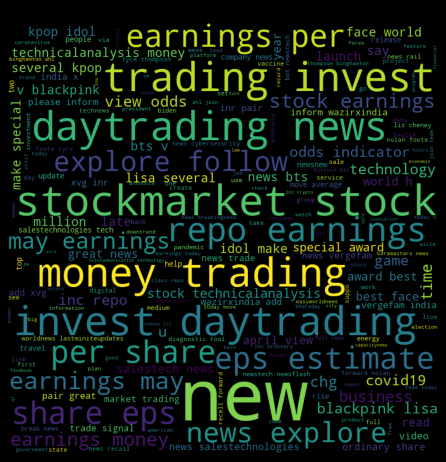

In [34]:
from wordcloud import WordCloud
def create_wordcloud(df):
    words = ''.join(list(df['lemma_str_text']))
    spam_wc = WordCloud(width = 800,height = 800).generate(words)
    plt.figure(figsize = (8,6),facecolor = 'k')
    plt.imshow(spam_wc)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.title('Word Cloud for the tweets in the text')
    plt.show()
    return
create_wordcloud(df)

In [35]:
'''from textblob import TextBlob
def sentiment_analysis(df):
    sentiment=[]
    Type=[]
    polarity=0
    for i in df['lemma_str_text']:
        sentiments=TextBlob(i)
        sentiment.append(sentiments)
        tweet_polarity=sentiments.polarity
        if tweet_polarity>0.00:
            Type.append('positive')
        elif tweet_polarity<0.00:
            Type.append('negative')
        elif tweet_polarity==0.00:
            Type.append('neutral')
        polarity+=tweet_polarity
    df['Sentiment']=Type
    return df
sentiment_analysis(df)
df.head()'''

"from textblob import TextBlob\ndef sentiment_analysis(df):\n    sentiment=[]\n    Type=[]\n    polarity=0\n    for i in df['lemma_str_text']:\n        sentiments=TextBlob(i)\n        sentiment.append(sentiments)\n        tweet_polarity=sentiments.polarity\n        if tweet_polarity>0.00:\n            Type.append('positive')\n        elif tweet_polarity<0.00:\n            Type.append('negative')\n        elif tweet_polarity==0.00:\n            Type.append('neutral')\n        polarity+=tweet_polarity\n    df['Sentiment']=Type\n    return df\nsentiment_analysis(df)\ndf.head()"

In [36]:
'''# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['target']= label_encoder.fit_transform(df['Sentiment'])

df['target'].unique()
# negative - 0
# neutral - 1
# positive - 2'''

"# Import label encoder\nfrom sklearn import preprocessing\n\n# label_encoder object knows how to understand word labels.\nlabel_encoder = preprocessing.LabelEncoder()\n\n# Encode labels in column 'species'.\ndf['target']= label_encoder.fit_transform(df['Sentiment'])\n\ndf['target'].unique()\n# negative - 0\n# neutral - 1\n# positive - 2"

In [37]:
'''# Word Cloud for positive tweets
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
positive_text_words = ' '.join([text for text in df['lemma_str_text'][df.Sentiment == 'positive']])
generate_wordcloud(positive_text_words)'''

'# Word Cloud for positive tweets\ndef generate_wordcloud(all_words):\n    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap=\'Dark2\').generate(all_words)\n\n    plt.figure(figsize=(14, 10))\n    plt.imshow(wordcloud, interpolation="bilinear")\n    plt.axis(\'off\')\n    plt.show()\npositive_text_words = \' \'.join([text for text in df[\'lemma_str_text\'][df.Sentiment == \'positive\']])\ngenerate_wordcloud(positive_text_words)'

In [38]:
'''plt.subplot(121)
plt.title('Location vs Likes')
df1=df['likescount'].groupby(df['location']).mean().sort_values(ascending=False).head(7)
df1.plot(kind='bar',colormap='viridis',figsize=(7,5))
plt.xticks(rotation=45) 
plt.subplot(122)
df2=df['retweetcount'].groupby(df['location']).mean().sort_values(ascending=False).head(7)
df2.plot(kind='bar',figsize=(12,5))
plt.xticks(rotation=45) 
plt.title('Location vs Retweets')
plt.show()'''

"plt.subplot(121)\nplt.title('Location vs Likes')\ndf1=df['likescount'].groupby(df['location']).mean().sort_values(ascending=False).head(7)\ndf1.plot(kind='bar',colormap='viridis',figsize=(7,5))\nplt.xticks(rotation=45) \nplt.subplot(122)\ndf2=df['retweetcount'].groupby(df['location']).mean().sort_values(ascending=False).head(7)\ndf2.plot(kind='bar',figsize=(12,5))\nplt.xticks(rotation=45) \nplt.title('Location vs Retweets')\nplt.show()"

In [39]:
words_in_tweet = [tweet.split() for tweet in df['text_clean']]
words_in_tweet[:2]

[['super',
  'animal',
  'royale',
  'brings',
  'bonkers',
  'action',
  'to',
  'ps4',
  'and',
  'ps5',
  'later',
  'this',
  'year',
  'gamergirl',
  'women',
  'ps4',
  'ps4players',
  'games',
  'news'],
 ['meetingwizard',
  'has',
  'anyone',
  'else',
  'noticed',
  'the',
  'random',
  'deletion',
  'censorship',
  'of',
  'azaudit',
  'org',
  'live',
  'links',
  'in',
  'tweets',
  'state',
  'senate',
  'election',
  'aud…']]

In [40]:
import itertools
import collections

all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('news', 1342),
 ('to', 593),
 ('the', 581),
 ('in', 349),
 ('and', 324),
 ('for', 324),
 ('of', 313),
 ('on', 269),
 ('earnings', 238),
 ('a', 237),
 ('2021', 185),
 ('with', 142),
 ('trading', 138),
 ('today', 129),
 ('from', 114)]

In [41]:
df_1 = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['text_words', 'text_count'])

df_1.head()

,text_words,text_count
0,news,1342
1,to,593
2,the,581
3,in,349
4,and,324


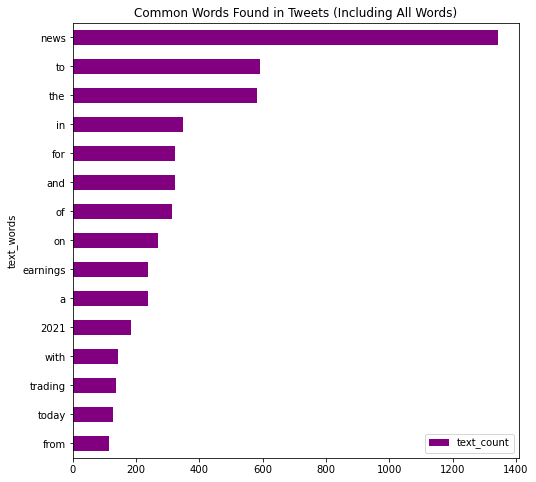

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df_1.sort_values(by='text_count').plot.barh(x='text_words',
                      y='text_count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [43]:
words_in_str_tweet = [tweet.split() for tweet in df['lemma_str_text']]
words_in_str_tweet[:2]

[['super',
  'animal',
  'royale',
  'bring',
  'bonkers',
  'action',
  'ps4',
  'ps5',
  'later',
  'year',
  'gamergirl',
  'woman',
  'ps4',
  'ps4players',
  'game',
  'news'],
 ['meetingwizard',
  'anyone',
  'else',
  'notice',
  'random',
  'deletion',
  'censorship',
  'azaudit',
  'org',
  'live',
  'link',
  'tweet',
  'state',
  'senate',
  'election',
  'aud…']]

In [44]:
import itertools
import collections

all_words_no_urls_1 = list(itertools.chain(*words_in_str_tweet))

# Create counter
counts_no_urls_1 = collections.Counter(all_words_no_urls_1)

counts_no_urls_1.most_common(10)

[('news', 1342),
 ('earnings', 238),
 ('2021', 185),
 ('today', 142),
 ('trading', 136),
 ('stock', 129),
 ('share', 114),
 ('may', 112),
 ('new', 108),
 ('follow', 107)]

In [45]:
df_2 = pd.DataFrame(counts_no_urls_1.most_common(10),
                             columns=['lemma_text_words', 'clean_text_count'])

df_2.head()

,lemma_text_words,clean_text_count
0,news,1342
1,earnings,238
2,2021,185
3,today,142
4,trading,136


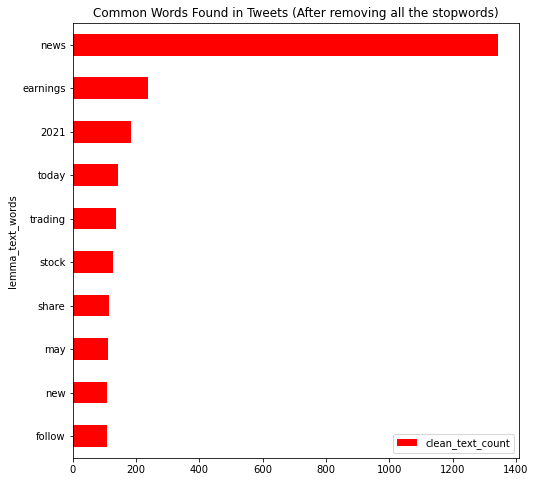

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df_2.sort_values(by='clean_text_count').plot.barh(x='lemma_text_words',
                      y='clean_text_count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets (After removing all the stopwords)")

plt.show()

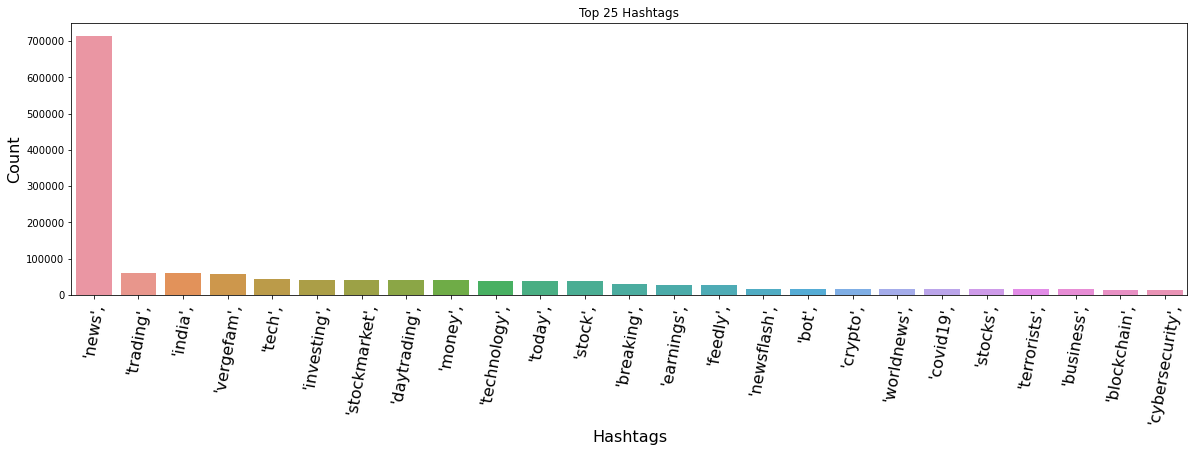

In [47]:
# Plotting top 25 hastags
hashtags = [tweet.split() for tweet in df['hashtags']]
hashtags = sum(hashtags, [])

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 25 most frequent hashtags     
    d = d.nlargest(columns = "Count", n = 25)
    plt.figure(figsize = (20,5))
    plt.title("Top 25 Hashtags")
    ax = sns.barplot(data = d, x = "Hashtag", y = "Count")
    plt.xticks(rotation = 80, fontsize = 16)
    ax.set_xlabel('Hashtags', fontsize = 16)
    ax.set_ylabel('Count', fontsize = 16)
    plt.show()
generate_hashtag_freqdist(hashtags)

In [48]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [49]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]
words = basic_clean(''.join(str(df['text_lemmatized'].tolist())))

In [50]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(news, today)           101
(stockmarket, stock)     99
(money, trading)         95
(invest, daytrading)     95
(trading, invest)        95
(daytrading, news)       95
(repo, earnings)         72
(earnings, per)          72
(per, share)             71
(eps, estimate)          71
dtype: int64

In [51]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(money, trading, invest)         95
(daytrading, news, today)        95
(trading, invest, daytrading)    95
(invest, daytrading, news)       95
(share, eps, estimate)           71
(earnings, per, share)           71
(per, share, eps)                71
(news, explore, follow)          70
(2021, earnings, per)            69
(earnings, may, 07)              66
dtype: int64

In [52]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

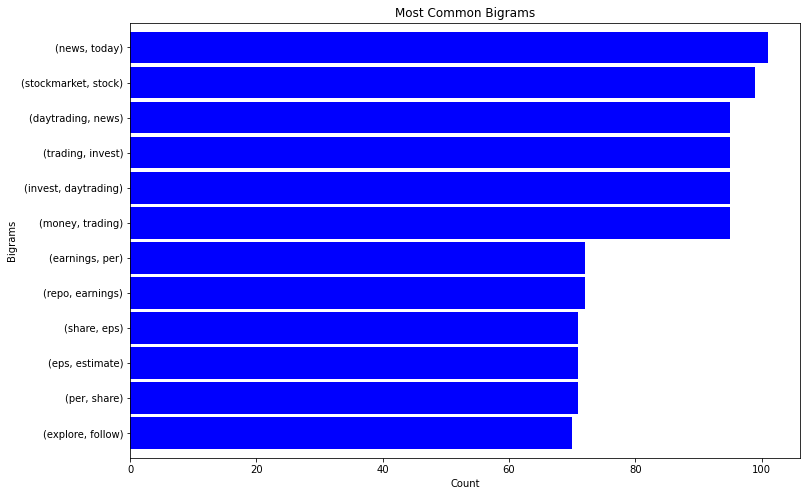

In [53]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title("Most Common Bigrams")
plt.xlabel("Count")
plt.ylabel("Bigrams")
plt.show()

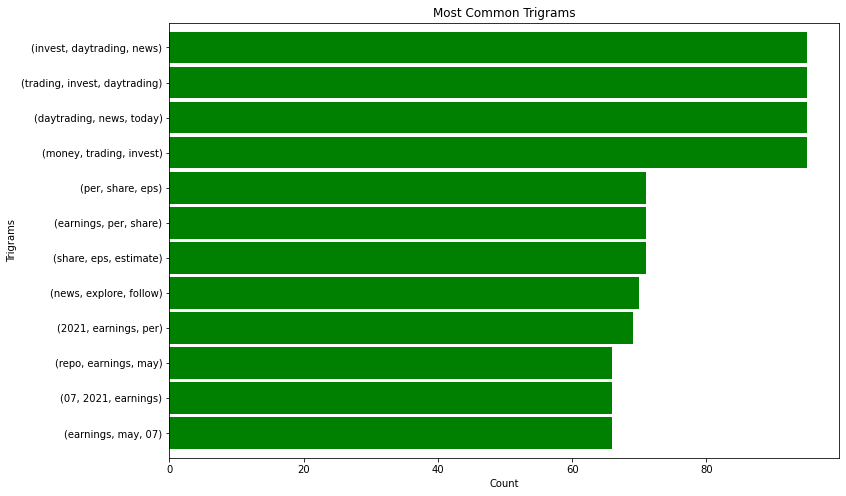

In [54]:
trigrams_series.sort_values().plot.barh(color='green', width=.9, figsize=(12, 8))
plt.title("Most Common Trigrams")
plt.xlabel("Count")
plt.ylabel("Trigrams")
plt.show()

In [55]:
# Tokenizing the tweet base description.

df['description_tokenized'] = df['description_clean'].apply(word_tokenize)

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags,text_wordnet_pos,text_lemmatized,lemma_str_text,description_tokenized
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']",5.312500,3,twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take a couple days but i always follow back,super animal royale brings bonkers action to ps4 and ps5 later this year gamergirl women ps4 ps4players games news,"[super, animal, royale, brings, bonkers, action, to, ps4, and, ps5, later, this, year, gamergirl, women, ps4, ps4players, games, news]","[super, animal, royale, brings, bonkers, action, ps4, ps5, later, year, gamergirl, women, ps4, ps4players, games, news]","[(super, JJ), (animal, JJ), (royale, NN), (brings, VBZ), (bonkers, NNS), (action, NN), (ps4, NN), (ps5, NN), (later, RB), (year, NN), (gamergirl, JJ), (women, NNS), (ps4, VBP), (ps4players, NNS), (games, NNS), (news, NN)]","[(super, a), (animal, a), (royale, n), (brings, v), (bonkers, n), (action, n), (ps4, n), (ps5, n), (later, r), (year, n), (gamergirl, a), (women, n), (ps4, v), (ps4players, n), (games, n), (news, n)]","[super, animal, royale, bring, bonkers, action, ps4, ps5, later, year, gamergirl, woman, ps4, ps4players, game, news]",super animal royale bring bonkers action ps4 ps5 later year gamergirl woman ps4 ps4players game news,"[twitch, stream, ashthebadash, youtube, ashthebadash, snap, ashthebadash, insta, ashthebadashit, may, take, a, couple, days, but, i, always, follow, back]"
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']",6.187500,4,author facilitator speaker trainer see biz booksaicles meetingwizard or posts on blogs 2bproductive orgthis thegodblessgirl,meetingwizard has anyone else noticed the random deletion censorship of azaudit org live links in tweets state senate election aud…,"[meetingwizard, has, anyone, else, noticed, the, random, deletion, censorship, of, azaudit, org, live, links, in, tweets, state, senate, election, aud…]","[meetingwizard, anyone, else, noticed, random, deletion, censorship, azaudit, org, live, links, tweets, state, senate, election, aud…]","[(meetingwizard, RB), (anyone, NN), (else, RB), (noticed, VBD), (random, JJ), (deletion, NN), (censorship, NN), (azaudit, NN), (org, VBP), (live, JJ), (links, NNS), (tweets, NNS), (state, NN), (senate, JJ), (election, NN), (aud…, NN)]","[(meetingwizard, r), (anyone, n), (else, r), (noticed, v), (random, a), (deletion, n), (censorship, n), (azaudit, n), (org, v), (live, a), (links, n), (tweets, n), (state, n), (senate, a), (election, n), (aud…, n)]","[meetingwizard, anyone, else, notice, random, deletion, censorship, azaudit, org, live, link, tweet, state, senate, election, aud…]",meetingwizard anyone else notice random deletion censorship azaudit org live link tweet state senate election aud…,"[author, facilitator, speaker, trainer, see, biz, booksaicles, meetingwi

In [56]:
# Removing stopwords.

df['description_stopwords_removed'] = df['description_tokenized'].apply(
    lambda x: [word for word in x if word not in stop])

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags,text_wordnet_pos,text_lemmatized,lemma_str_text,description_tokenized,description_stopwords_removed
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']",5.312500,3,twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take a couple days but i always follow back,super animal royale brings bonkers action to ps4 and ps5 later this year gamergirl women ps4 ps4players games news,"[super, animal, royale, brings, bonkers, action, to, ps4, and, ps5, later, this, year, gamergirl, women, ps4, ps4players, games, news]","[super, animal, royale, brings, bonkers, action, ps4, ps5, later, year, gamergirl, women, ps4, ps4players, games, news]","[(super, JJ), (animal, JJ), (royale, NN), (brings, VBZ), (bonkers, NNS), (action, NN), (ps4, NN), (ps5, NN), (later, RB), (year, NN), (gamergirl, JJ), (women, NNS), (ps4, VBP), (ps4players, NNS), (games, NNS), (news, NN)]","[(super, a), (animal, a), (royale, n), (brings, v), (bonkers, n), (action, n), (ps4, n), (ps5, n), (later, r), (year, n), (gamergirl, a), (women, n), (ps4, v), (ps4players, n), (games, n), (news, n)]","[super, animal, royale, bring, bonkers, action, ps4, ps5, later, year, gamergirl, woman, ps4, ps4players, game, news]",super animal royale bring bonkers action ps4 ps5 later year gamergirl woman ps4 ps4players game news,"[twitch, stream, ashthebadash, youtube, ashthebadash, snap, ashthebadash, insta, ashthebadashit, may, take, a, couple, days, but, i, always, follow, back]","[twitch, stream, ashthebadash, youtube, ashthebadash, snap, ashthebadash, insta, ashthebadashit, may, take, couple, days, always, follow, back]"
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']",6.187500,4,author facilitator speaker trainer see biz booksaicles meetingwizard or posts on blogs 2bproductive orgthis thegodblessgirl,meetingwizard has anyone else noticed the random deletion censorship of azaudit org live links in tweets state senate election aud…,"[meetingwizard, has, anyone, else, noticed, the, random, deletion, censorship, of, azaudit, org, live, links, in, tweets, state, senate, election, aud…]","[meetingwizard, anyone, else, noticed, random, deletion, censorship, azaudit, org, live, links, tweets, state, senate, election, aud…]","[(meetingwizard, RB), (anyone, NN), (else, RB), (noticed, VBD), (random, JJ), (deletion, NN), (censorship, NN), (azaudit, NN), (org, VBP), (live, JJ), (links, NNS), (tweets, NNS), (state, NN), (senate, JJ), (election, NN), (aud…, NN)]","[(meetingwizard, r), (anyone, n), (else, r), (noticed, v), (random, a), (deletion, n), (censorship, n), (azaudit, n), (org, v), (live, a), (links, n), (tweets, n), (state, n), (senate, a), (election, n), (aud…, n)]","[meetingwizard, anyone, else, notice, random, deletion, censorship, azaudit, org, live, link, tweet, state, senate, election, aud…]",meetingwizar

In [57]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

df['description_lemmatized'] = df['description_stopwords_removed'].apply(
    lambda x: [wnl.lemmatize(word) for word in x])

df['description_lemmatized'] = df['description_lemmatized'].apply(
    lambda x: [word for word in x if word not in stop])

df['description_str_text'] = [' '.join(map(str, l)) for l in df['description_lemmatized']]

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags,text_wordnet_pos,text_lemmatized,lemma_str_text,description_tokenized,description_stopwords_removed,description_lemmatized,description_str_text
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']",5.312500,3,twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take a couple days but i always follow back,super animal royale brings bonkers action to ps4 and ps5 later this year gamergirl women ps4 ps4players games news,"[super, animal, royale, brings, bonkers, action, to, ps4, and, ps5, later, this, year, gamergirl, women, ps4, ps4players, games, news]","[super, animal, royale, brings, bonkers, action, ps4, ps5, later, year, gamergirl, women, ps4, ps4players, games, news]","[(super, JJ), (animal, JJ), (royale, NN), (brings, VBZ), (bonkers, NNS), (action, NN), (ps4, NN), (ps5, NN), (later, RB), (year, NN), (gamergirl, JJ), (women, NNS), (ps4, VBP), (ps4players, NNS), (games, NNS), (news, NN)]","[(super, a), (animal, a), (royale, n), (brings, v), (bonkers, n), (action, n), (ps4, n), (ps5, n), (later, r), (year, n), (gamergirl, a), (women, n), (ps4, v), (ps4players, n), (games, n), (news, n)]","[super, animal, royale, bring, bonkers, action, ps4, ps5, later, year, gamergirl, woman, ps4, ps4players, game, news]",super animal royale bring bonkers action ps4 ps5 later year gamergirl woman ps4 ps4players game news,"[twitch, stream, ashthebadash, youtube, ashthebadash, snap, ashthebadash, insta, ashthebadashit, may, take, a, couple, days, but, i, always, follow, back]","[twitch, stream, ashthebadash, youtube, ashthebadash, snap, ashthebadash, insta, ashthebadashit, may, take, couple, days, always, follow, back]","[twitch, stream, ashthebadash, youtube, ashthebadash, snap, ashthebadash, insta, ashthebadashit, may, take, couple, day, always, follow, back]",twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take couple day always follow back
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']",6.187500,4,author facilitator speaker trainer see biz booksaicles meetingwizard or posts on blogs 2bproductive orgthis thegodblessgirl,meetingwizard has anyone else noticed the random deletion censorship of azaudit org live links in tweets state senate election aud…,"[meetingwizard, has, anyone, else, noticed, the, random, deletion, censorship, of, azaudit, org, live, links, in, tweets, state, senate, election, aud…]","[meetingwizard, anyone, else, noticed, random, deletion, censorship, azaudit, org, live, links, tweets, state, senate, election, aud…]","[(meetingwizard, RB), (anyone, NN), (else, RB), (noticed, VBD), (random, JJ), (deletion, NN), (censorship, NN), (azaudit, NN), (org, VBP), (live, JJ), (links, NNS), (tweets, NNS), (state, NN), (senate, JJ), (election, NN), (aud…, NN)]","[(meetingwizard, r), (anyone, n), (else, r), (n

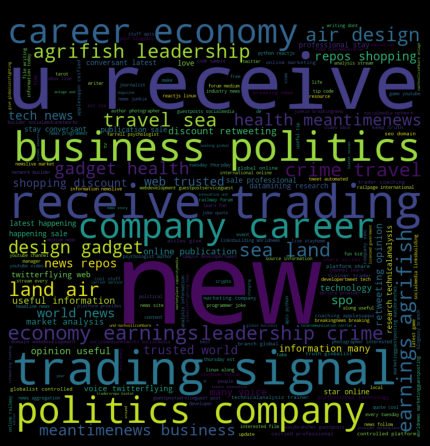

In [58]:
from wordcloud import WordCloud
def create_wordcloud(df):
    words = ''.join(list(df['description_str_text']))
    spam_wc = WordCloud(width = 800,height = 800).generate(words)
    plt.figure(figsize = (8,6),facecolor = 'k')
    plt.title('Word Cloud for the tweets in the description')
    plt.imshow(spam_wc)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()
    return
create_wordcloud(df)

In [59]:
df['target'] = 0
df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags,text_wordnet_pos,text_lemmatized,lemma_str_text,description_tokenized,description_stopwords_removed,description_lemmatized,description_str_text,target
6,ashthebadash,"• twitch stream: ashthebadash\n• youtube: ashthebadash • snap: ashthebadash • insta: _ashthebadash\nit may take a couple days, but i always follow back 💕",147,150,super animal royale brings bonkers action to ps4 and ps5 later this year https://t.co/gkgmozdtjv #gamergirl #women #ps4 #ps4players #games #news https://t.co/r5ri9q5usn,0,0,2021-05-06 14:24:15,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news']",5.312500,3,twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take a couple days but i always follow back,super animal royale brings bonkers action to ps4 and ps5 later this year gamergirl women ps4 ps4players games news,"[super, animal, royale, brings, bonkers, action, to, ps4, and, ps5, later, this, year, gamergirl, women, ps4, ps4players, games, news]","[super, animal, royale, brings, bonkers, action, ps4, ps5, later, year, gamergirl, women, ps4, ps4players, games, news]","[(super, JJ), (animal, JJ), (royale, NN), (brings, VBZ), (bonkers, NNS), (action, NN), (ps4, NN), (ps5, NN), (later, RB), (year, NN), (gamergirl, JJ), (women, NNS), (ps4, VBP), (ps4players, NNS), (games, NNS), (news, NN)]","[(super, a), (animal, a), (royale, n), (brings, v), (bonkers, n), (action, n), (ps4, n), (ps5, n), (later, r), (year, n), (gamergirl, a), (women, n), (ps4, v), (ps4players, n), (games, n), (news, n)]","[super, animal, royale, bring, bonkers, action, ps4, ps5, later, year, gamergirl, woman, ps4, ps4players, game, news]",super animal royale bring bonkers action ps4 ps5 later year gamergirl woman ps4 ps4players game news,"[twitch, stream, ashthebadash, youtube, ashthebadash, snap, ashthebadash, insta, ashthebadashit, may, take, a, couple, days, but, i, always, follow, back]","[twitch, stream, ashthebadash, youtube, ashthebadash, snap, ashthebadash, insta, ashthebadashit, may, take, couple, days, always, follow, back]","[twitch, stream, ashthebadash, youtube, ashthebadash, snap, ashthebadash, insta, ashthebadashit, may, take, couple, day, always, follow, back]",twitch stream ashthebadash youtube ashthebadash snap ashthebadash insta ashthebadashit may take couple day always follow back,0
7,shirleyfinelee,"author, facilitator, speaker, & trainer - see biz books/articles @meetingwizard or posts on blogs @2bproductive , @orgthis , @thegodblessgirl",20,45,rt @meetingwizard: has anyone else noticed the random deletion #censorship of azaudit .org live links in tweets? state senate election aud…,0,1,2021-05-06 14:24:14,"['blockchain', 'boove', 'business', 'covid19', 'crypto', 'news', 'bitcoin', 'breaking', 'news', 'news', 'news', 'news', 'gamergirl', 'women', 'ps4', 'ps4players', 'games', 'news', 'censorship']",6.187500,4,author facilitator speaker trainer see biz booksaicles meetingwizard or posts on blogs 2bproductive orgthis thegodblessgirl,meetingwizard has anyone else noticed the random deletion censorship of azaudit org live links in tweets state senate election aud…,"[meetingwizard, has, anyone, else, noticed, the, random, deletion, censorship, of, azaudit, org, live, links, in, tweets, state, senate, election, aud…]","[meetingwizard, anyone, else, noticed, random, deletion, censorship, azaudit, org, live, links, tweets, state, senate, election, aud…]","[(meetingwizard, RB), (anyone, NN), (else, RB), (noticed, VBD), (random, JJ), (deletion, NN), (censorship, NN), (azaudit, NN), (org, VBP), (live, JJ), (links, NNS), (tweets, NNS), (state, NN), (senate, JJ), (election, NN), (aud…, NN)]","[(meetingwizard, r), (anyone, n), (els

In [60]:
df.to_excel("news_analysis_tweets.xlsx")